<a href="https://colab.research.google.com/github/AabidMK/Object-Recognition-System__Infosys_Internship_Feb2025/blob/SAHAANA_SG/InfosysNew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#Import the necessary libraries
import os
import json
import zipfile
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split


In [ ]:
#Extract the dataset
dataset_path = "/content/drive/My Drive/dataset/coco2017_subset.zip"
extract_to = "/content/"

with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Dataset extracted successfully.")


Dataset extracted successfully.


In [ ]:
#Load and explore the dataset
annotation_file = os.path.join(extract_to, "coco2017_subset", "annotation_subset", "instances_train2017_subset.json")

with open(annotation_file, 'r') as f:
    coco_data = json.load(f)

print("COCO annotation file loaded successfully.")


COCO annotation file loaded successfully.


In [ ]:
#Verifying the JSON keys
print("Available keys in COCO dataset:", coco_data.keys())


Available keys in COCO dataset: dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])


In [ ]:
#Categories in dataset
categories = coco_data["categories"]
print("Total categories:", len(categories))
print("Sample categories:", categories[:5])


Total categories: 80
Sample categories: [{'supercategory': 'person', 'id': 1, 'name': 'person'}, {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'}, {'supercategory': 'vehicle', 'id': 3, 'name': 'car'}, {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'}, {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'}]


In [ ]:
#Image Metadata
images = coco_data["images"]
print("Total images in subset:", len(images))
print("Sample image metadata:", images[:3])


Total images in subset: 29571
Sample image metadata: [{'license': 4, 'file_name': '000000522418.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000522418.jpg', 'height': 480, 'width': 640, 'date_captured': '2013-11-14 11:38:44', 'flickr_url': 'http://farm1.staticflickr.com/1/127244861_ab0c0381e7_z.jpg', 'id': 522418}, {'license': 3, 'file_name': '000000554625.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000554625.jpg', 'height': 640, 'width': 426, 'date_captured': '2013-11-14 16:03:19', 'flickr_url': 'http://farm5.staticflickr.com/4086/5094162993_8f59d8a473_z.jpg', 'id': 554625}, {'license': 2, 'file_name': '000000309022.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000309022.jpg', 'height': 480, 'width': 640, 'date_captured': '2013-11-14 17:28:23', 'flickr_url': 'http://farm4.staticflickr.com/3790/10167396295_e63f2856d0_z.jpg', 'id': 309022}]


In [ ]:
#Number of Annotations
annotations = coco_data["annotations"]
print("Total annotations in subset:", len(annotations))


Total annotations in subset: 212806


In [ ]:
#WORKING WITH IMAGES

In [ ]:
#Images in Training Dataset
train_folder = os.path.join(extract_to, "coco2017_subset", "train2017")
print("Files in train2017:", os.listdir(train_folder)[:10])  # Show first 10 files


Files in train2017: ['000000318087.jpg', '000000109005.jpg', '000000350534.jpg', '000000466491.jpg', '000000208976.jpg', '000000401433.jpg', '000000085048.jpg', '000000423172.jpg', '000000413999.jpg', '000000157416.jpg']


In [ ]:
#Display a random image

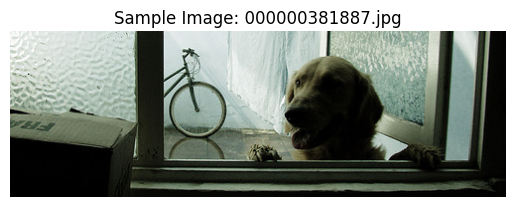

In [ ]:
random_image = random.choice(images)
image_path = os.path.join(train_folder, random_image["file_name"])

if os.path.exists(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print("OpenCV could not read the image. Check the file format.")
    else:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.axis("off")
        plt.title(f"Sample Image: {random_image['file_name']}")
        plt.show()
else:
    print("Error: Image file not found!")


In [ ]:
#Annotations of the image

In [ ]:
image_id = random_image["id"]
image_annotations = [ann for ann in annotations if ann["image_id"] == image_id]

print(f"Annotations for image {image_id}:")
print(image_annotations[:5])  # Show first 5 annotations


Annotations for image 381887:
[{'segmentation': [[379.93, 129.41, 386.89, 124.77, 402.55, 114.33, 417.05, 113.17, 425.17, 117.23, 436.19, 121.87, 437.94, 134.63, 425.17, 141.01, 408.35, 134.63, 392.69, 127.67, 381.09, 129.99, 271.46, 129.41, 258.7, 131.73, 244.2, 129.99, 238.4, 122.45, 245.94, 111.42, 260.44, 113.17, 269.72, 118.97, 272.04, 125.93, 283.06, 129.41, 287.12, 121.29, 284.22, 111.42, 281.9, 98.08, 287.12, 98.66, 277.26, 89.38, 277.84, 77.2, 275.52, 66.18, 281.9, 44.72, 288.86, 38.34, 290.6, 40.66, 301.62, 30.22, 314.97, 24.42, 327.15, 24.42, 341.65, 28.48, 353.83, 40.66, 361.95, 41.82, 367.17, 53.42, 365.43, 54.0, 370.65, 62.7, 376.45, 72.56, 377.03, 80.1, 372.97, 89.38, 368.91, 94.02, 370.65, 96.92, 373.55, 99.82, 367.75, 105.62, 366.01, 114.33, 371.23, 117.23, 376.45, 112.0, 375.29, 118.97, 379.35, 117.81, 378.19, 128.83]], 'area': 10203.7284, 'iscrowd': 0, 'image_id': 381887, 'bbox': [238.4, 24.42, 199.54, 116.59], 'category_id': 18, 'id': 6984}, {'segmentation': [[165.7

In [ ]:
#Boundary Boxes

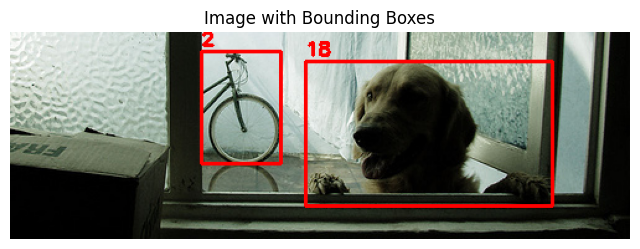

In [ ]:
def draw_bboxes(image_path, image_annotations):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    for ann in image_annotations:
        bbox = ann["bbox"]  # [x, y, width, height]
        x, y, w, h = map(int, bbox)
        category_id = ann["category_id"]

        # Draw bounding box
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

        # Add category ID
        cv2.putText(image, str(category_id), (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    plt.axis("off")
    plt.title("Image with Bounding Boxes")
    plt.show()

# Call the function
draw_bboxes(image_path, image_annotations)


In [ ]:
#Data Analysis

In [ ]:
#Count objects per category
category_counts = {}
for ann in annotations:
    category_id = ann["category_id"]
    category_counts[category_id] = category_counts.get(category_id, 0) + 1

df = pd.DataFrame(list(category_counts.items()), columns=["Category ID", "Count"])
df = df.sort_values(by="Count", ascending=False)

print(df.head(10))  # Show top 10 categories


    Category ID  Count
19            1  65165
13            3  10945
10           62   9703
64           84   6185
8            44   5780
44           47   4868
11           67   3759
48           51   3745
69           31   3019
30           10   2982


In [ ]:
#Plotting the category distribution

<ipython-input-22-787d6d2df665>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Category ID"], y=df["Count"], palette="viridis")


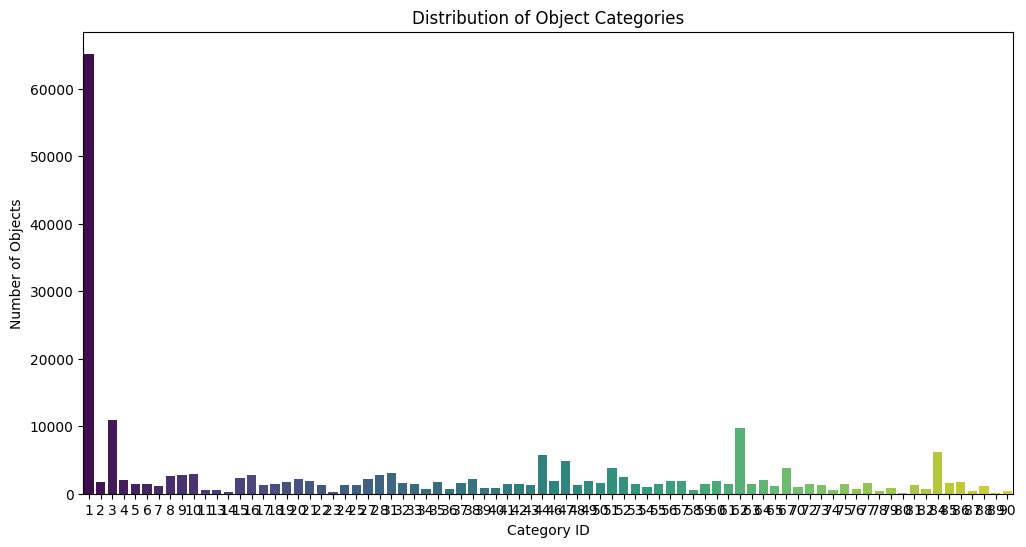

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df["Category ID"], y=df["Count"], palette="viridis")
plt.xlabel("Category ID")
plt.ylabel("Number of Objects")
plt.title("Distribution of Object Categories")
plt.show()
